# Imports and data loading

In [1]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import graphviz
import pydot
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from IPython.display import SVG
from keras.layers.core import Dense, Lambda, Activation
from keras.utils.vis_utils import model_to_dot
from keras import initializers
from keras.regularizers import l2
from keras.models import Model
from keras.layers import Embedding, Input, Dense, merge, Flatten, concatenate, multiply
from keras.optimizers import Adagrad, Adam, SGD, RMSprop
keras.utils.vis_utils.pydot = pydot

Using TensorFlow backend.


In [2]:
# Split Movielens 100K data into train and test (80-20)
np.seed = 1
dataset = pd.read_csv("../data/u.data",sep='\t',names="user_id,item_id,rating,timestamp".split(","))
dataset.user_id = dataset.user_id.astype('category').cat.codes.values
dataset.item_id = dataset.item_id.astype('category').cat.codes.values
train, test = train_test_split(dataset, test_size=0.2)

# Building the model

In [3]:
# Build user and item input
n_users, n_movies = len(dataset.user_id.unique()), len(dataset.item_id.unique())
movie_input = keras.layers.Input(shape=[1],name='Item')
user_input = keras.layers.Input(shape=[1],name='User')

In [4]:
# Constant declarations
mf_dim=8
mlp_user_dim = 10
mlp_item_dim = 10
layers=[100, 50, 20]

# Embedding layers
MF_Embedding_User = Embedding(input_dim=n_users+1, output_dim=mf_dim, name='mf_embedding_user')
MF_Embedding_Item = Embedding(input_dim=n_movies+1, output_dim=mf_dim, name='mf_embedding_item')

MLP_Embedding_User = Embedding(input_dim=n_users+1, output_dim=mlp_user_dim, name="mlp_embedding_user")
MLP_Embedding_Item = Embedding(input_dim=n_movies+1, output_dim=mlp_item_dim, name='mlp_embedding_item')

# MF part
mf_user_latent = Flatten()(MF_Embedding_User(user_input))
mf_item_latent = Flatten()(MF_Embedding_Item(movie_input))
mf_vector = multiply([mf_user_latent, mf_item_latent]) # element-wise multiply

# MLP part
num_layer = len(layers) #Number of layers in the MLP
mlp_user_latent = Flatten()(MLP_Embedding_User(user_input))
mlp_item_latent = Flatten()(MLP_Embedding_Item(movie_input))
mlp_vector = concatenate([mlp_user_latent, mlp_item_latent])
for idx in range(0, num_layer):
    layer = keras.layers.Dense(layers[idx],name='fully-connected-%d' % idx)
    mlp_vector = layer(mlp_vector)

# Concatenate MF and MLP parts
predict_vector = concatenate([mf_vector, mlp_vector])

# Final prediction layer
prediction = Dense(1, activation='relu',name='prediction')(predict_vector)

model = Model(inputs=[user_input, movie_input],
               outputs=prediction)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


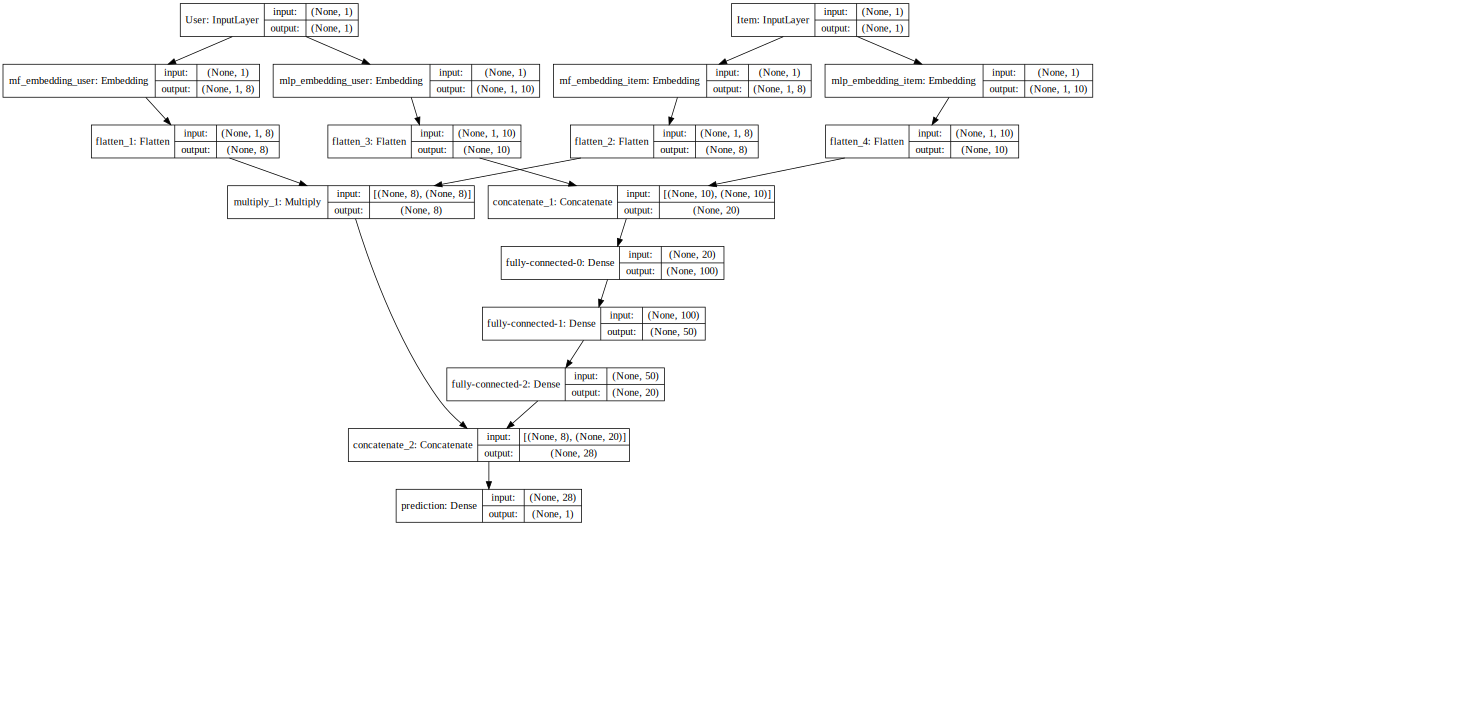

In [5]:
SVG(model_to_dot(model, show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

In [6]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
Item (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
mlp_embedding_user (Embedding)  (None, 1, 10)        9440        User[0][0]                       
__________________________________________________________________________________________________
mlp_embedding_item (Embedding)  (None, 1, 10)        16830       Item[0][0]                       
____________________________________________________________________________________________

In [7]:
adam_opt = Adam(lr=0.005)
model.compile(optimizer=adam_opt, loss='mean_absolute_error')
history = model.fit([train.user_id, train.item_id], train.rating, epochs=100, verbose=1)


Epoch 1/100
80000/80000 [==============================] - 7s 85us/step - loss: 0.8098
Epoch 2/100
80000/80000 [==============================] - 7s 81us/step - loss: 0.7406
Epoch 3/100
80000/80000 [==============================] - 7s 84us/step - loss: 0.6978
Epoch 4/100
80000/80000 [==============================] - 6s 77us/step - loss: 0.6667
Epoch 5/100
80000/80000 [==============================] - 7s 85us/step - loss: 0.6447
Epoch 6/100
80000/80000 [==============================] - 7s 84us/step - loss: 0.6283
Epoch 7/100
80000/80000 [==============================] - 7s 83us/step - loss: 0.6167
Epoch 8/100
80000/80000 [==============================] - 6s 80us/step - loss: 0.6095
Epoch 9/100
80000/80000 [==============================] - 6s 74us/step - loss: 0.6014
Epoch 10/100
80000/80000 [==============================] - 6s 73us/step - loss: 0.5953
Epoch 11/100
80000/80000 [==============================] - 7s 83us/step - loss: 0.5906
Epoch 12/100
80000/80000 [==============

80000/80000 [==============================] - 6s 78us/step - loss: 0.5292
Epoch 90/100
80000/80000 [==============================] - 6s 78us/step - loss: 0.5284
Epoch 91/100
80000/80000 [==============================] - 6s 73us/step - loss: 0.5285
Epoch 92/100
80000/80000 [==============================] - 5s 68us/step - loss: 0.5283
Epoch 93/100
80000/80000 [==============================] - 5s 69us/step - loss: 0.5286
Epoch 94/100
80000/80000 [==============================] - 6s 71us/step - loss: 0.5272
Epoch 95/100
80000/80000 [==============================] - 6s 71us/step - loss: 0.5276: 0s - loss
Epoch 96/100
80000/80000 [==============================] - 6s 70us/step - loss: 0.5279
Epoch 97/100
80000/80000 [==============================] - 6s 71us/step - loss: 0.5273
Epoch 98/100
80000/80000 [==============================] - 7s 82us/step - loss: 0.5272: 0s -
Epoch 99/100
80000/80000 [==============================] - 6s 76us/step - loss: 0.5279
Epoch 100/100
80000/80000 [=

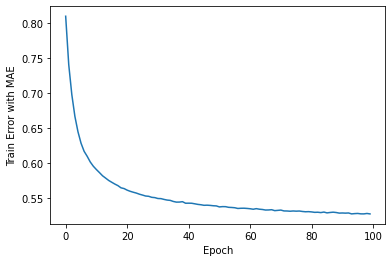

In [8]:
pd.Series(history.history['loss']).plot()
plt.xlabel("Epoch")
plt.ylabel("Train Error with MAE")
plt.show()

In [9]:
y_hat = np.round(model.predict([test.user_id, test.item_id]),0)
y_true = test.rating
print("MAE on test data:",mean_absolute_error(y_true, y_hat))
print("RMSE on test data:",np.sqrt(mean_squared_error(y_true, y_hat)))

MAE on test data: 0.76395
RMSE on test data: 1.094326276756617
